In [30]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 252.4 kB/s eta 0:00:04
   -------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 356.2 kB/s eta 0:00:04
   ----------- ---------------------------- 0.5/1.8 MB 356.2 kB/s eta 0:00:04
   ----------- ---------------------------- 0.5/1.8 MB 356.2 kB/s eta 0:00:04
   ----------------- ---------------------- 0.8/1.8 MB 384.8 kB/s eta 0:00:03
   ----------------------- ---------------- 1.0/1.8 MB 464

In [1]:
import pandas as pd
import numpy as np

In [37]:
df=pd.read_excel("Online_Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [38]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [39]:
df.isnull().sum

<bound method DataFrame.sum of         InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0           False      False        False     False        False      False   
1           False      False        False     False        False      False   
2           False      False        False     False        False      False   
3           False      False        False     False        False      False   
4           False      False        False     False        False      False   
...           ...        ...          ...       ...          ...        ...   
541904      False      False        False     False        False      False   
541905      False      False        False     False        False      False   
541906      False      False        False     False        False      False   
541907      False      False        False     False        False      False   
541908      False      False        False     False        False      False   

        CustomerID  

In [40]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cust

In [41]:
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

In [42]:
#Total Price Column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [43]:
df['TotalPrice']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalPrice, Length: 397884, dtype: float64

In [44]:
#Convert Data Features
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

In [45]:
#Demand Feature
df['DemandLevel'] = pd.qcut(df['Quantity'], q=4, labels=[1,2,3,4])

In [46]:
#Discount Column
df['DiscountPercent'] = df.apply(
    lambda row: np.random.randint(10, 30) if row['Quantity'] > 10
    else np.random.randint(0, 10),
    axis=1
)

In [47]:
df['DiscountPercent'].value_counts()

DiscountPercent
7     27355
9     27274
1     27267
4     27170
0     27164
5     27156
6     27093
2     27061
3     27055
8     26994
29     6569
17     6478
11     6405
13     6383
14     6375
26     6361
21     6349
27     6342
28     6305
20     6278
12     6276
16     6272
15     6255
24     6255
23     6240
22     6240
19     6240
25     6226
18     6224
10     6222
Name: count, dtype: int64

In [48]:
df['PriceCategory'] = pd.qcut(df['UnitPrice'], q=4, labels=[1,2,3,4])

In [49]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Month', 'Day',
       'Hour', 'DayOfWeek', 'DemandLevel', 'DiscountPercent', 'PriceCategory'],
      dtype='object')

In [50]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day,Hour,DayOfWeek,DemandLevel,DiscountPercent,PriceCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,1,8,2,2,7,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2,2,4,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,1,8,2,3,3,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2,2,8,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,1,8,2,2,6,3


In [51]:
features = ['Quantity', 'UnitPrice', 'TotalPrice', 
            'Month', 'Day', 'Hour', 'DayOfWeek', 
            'DemandLevel', 'PriceCategory']

In [52]:
X = df[features]
y = df['DiscountPercent']

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [54]:
import lightgbm as lgb

In [55]:
model = lgb.LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 647
[LightGBM] [Info] Number of data points in the train set: 318307, number of used features: 9
[LightGBM] [Info] Start training from score 9.275272


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [57]:
pred = model.predict(X_test)
pred

array([ 4.50066757, 19.49209647, 19.52867919, ...,  4.50960994,
        4.43266771, 21.20719789], shape=(79577,))

In [58]:
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE:", mean_absolute_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))


MAE: 3.2975565379203644
R2 Score: 0.7488719187194666


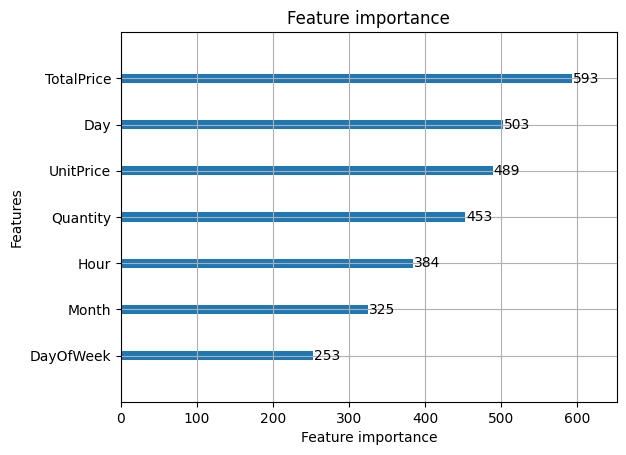

In [59]:
import matplotlib.pyplot as plt

lgb.plot_importance(model)
plt.show()


In [60]:
import pickle
pickle.dump(model, open('pricewise_model.pkl', 'wb'))